In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
btc_data = yf.download('BTC-USD', start='2023-04-18', end='2023-04-19',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
btc_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-18 00:00:00+00:00,29449.091797,29449.091797,29449.091797,29449.091797,29449.091797,0
2023-04-18 00:01:00+00:00,29446.566406,29446.566406,29446.566406,29446.566406,29446.566406,0
2023-04-18 00:04:00+00:00,29446.875000,29446.875000,29446.875000,29446.875000,29446.875000,0
2023-04-18 00:05:00+00:00,29449.507812,29449.507812,29449.507812,29449.507812,29449.507812,51200
2023-04-18 00:06:00+00:00,29449.611328,29449.611328,29449.611328,29449.611328,29449.611328,0
...,...,...,...,...,...,...
2023-04-18 23:52:00+00:00,30366.251953,30366.251953,30366.251953,30366.251953,30366.251953,5722112
2023-04-18 23:53:00+00:00,30374.505859,30374.505859,30374.505859,30374.505859,30374.505859,2205696
2023-04-18 23:56:00+00:00,30387.984375,30387.984375,30387.984375,30387.984375,30387.984375,1505280


In [6]:
eth_data = yf.download('ETH-USD', start='2023-04-18', end='2023-04-19',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [7]:
eth_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-18 00:00:00+00:00,2075.855225,2075.855225,2075.855225,2075.855225,2075.855225,0
2023-04-18 00:01:00+00:00,2075.431396,2075.431396,2075.431396,2075.431396,2075.431396,0
2023-04-18 00:04:00+00:00,2075.654541,2075.654541,2075.654541,2075.654541,2075.654541,0
2023-04-18 00:05:00+00:00,2075.506104,2075.506104,2075.506104,2075.506104,2075.506104,642048
2023-04-18 00:06:00+00:00,2075.417236,2075.417236,2075.417236,2075.417236,2075.417236,0
...,...,...,...,...,...,...
2023-04-18 23:52:00+00:00,2103.323975,2103.323975,2103.323975,2103.323975,2103.323975,4423680
2023-04-18 23:53:00+00:00,2104.002930,2104.002930,2104.002930,2104.002930,2104.002930,153600
2023-04-18 23:56:00+00:00,2104.829102,2104.829102,2104.829102,2104.829102,2104.829102,1854464


In [8]:
S1_0 = btc_data['Open'][0]
S2_0 = eth_data['Open'][0]

In [9]:
S1_0

29449.091796875

In [10]:
S2_0

2075.855224609375

In [11]:
lr1 = np.log(btc_data['Adj Close'] / btc_data['Adj Close'].shift(1))
lr2 = np.log(eth_data['Adj Close'] / eth_data['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1186
mu_2 = lr2.mean() * 1186
sigma_1 = lr1.std() * np.sqrt(1186)
sigma_2 = lr2.std() * np.sqrt(1186)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(btc_data)

In [12]:
result = linregress(np.log(btc_data['Adj Close']), np.log(eth_data['Adj Close']))
beta = result.slope

In [13]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [14]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = btc_data['Adj Close'][t-1]
    S2[t] = eth_data['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

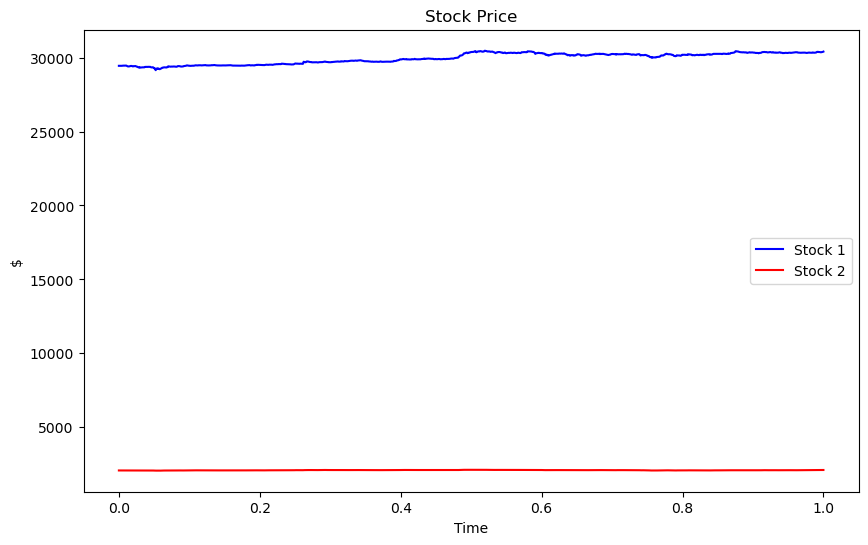

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

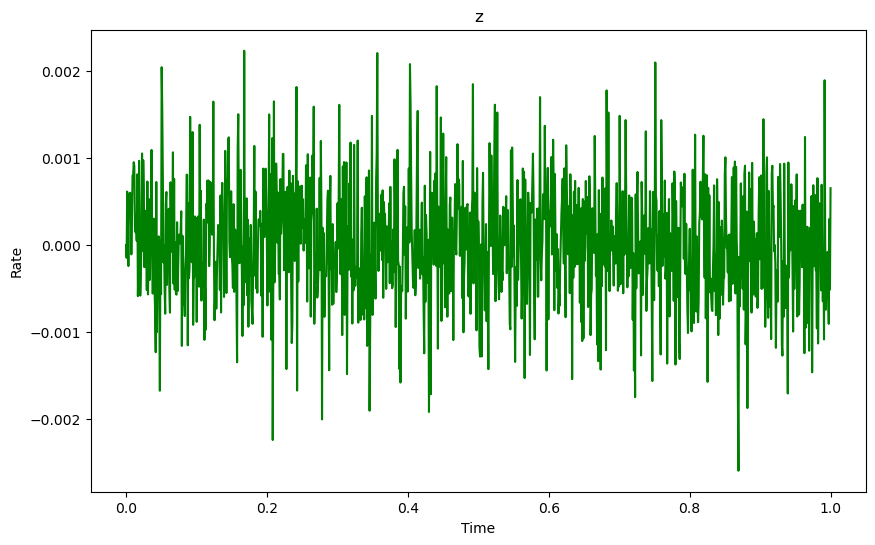

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [17]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t-1]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t-1]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

In [19]:
Pi_1[0]

array([0.])

In [20]:
Pi_1[1]

array([0.00326474])

Text(0.5, 1.0, 'Weights')

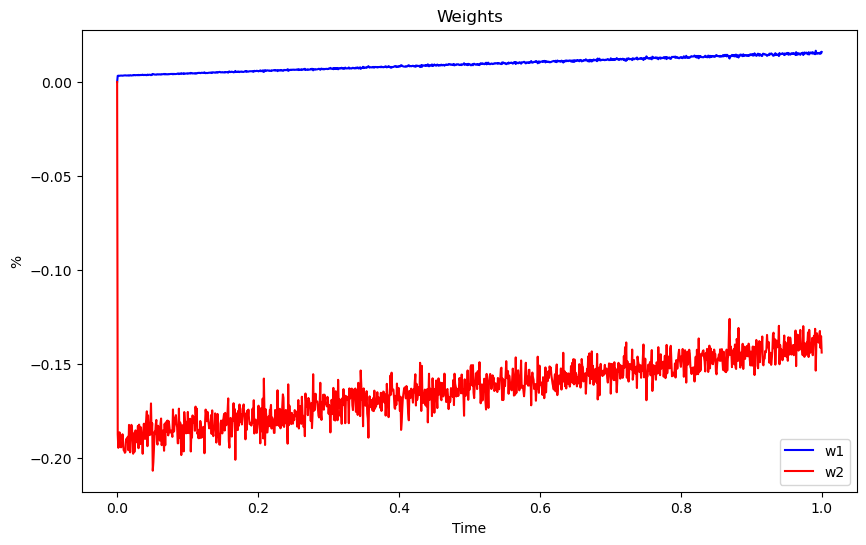

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

In [24]:
len(Pi_1)

1187

Text(0.5, 1.0, 'Wealth')

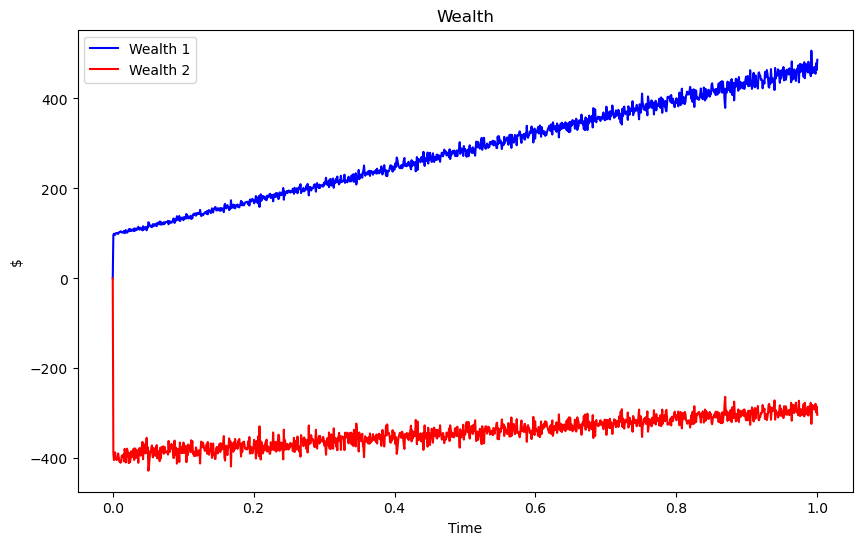

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [27]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

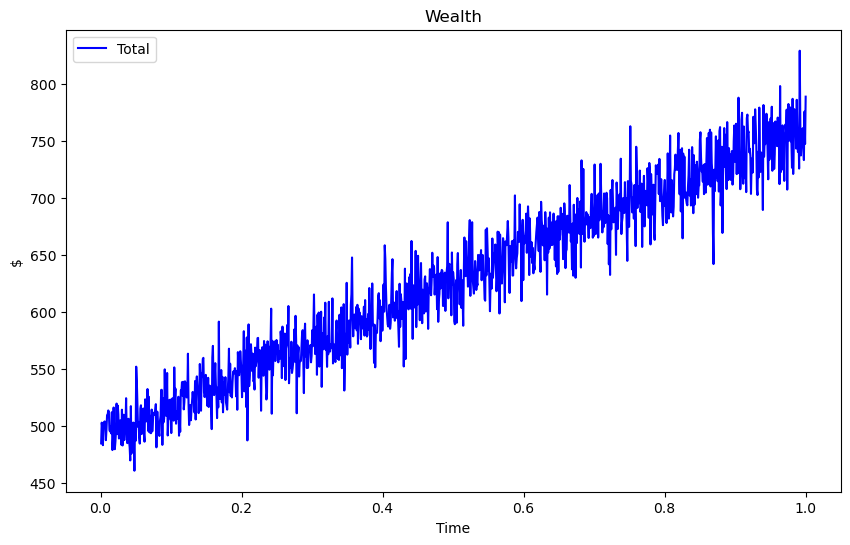

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [29]:
Wealth[1]

array([485.02587575])

In [30]:
Wealth[-1]

array([789.08684329])

In [32]:
Return = (Wealth[-1] - Wealth[1])/Wealth[1]
Return.item()

0.6268963837487225